In [1]:
# Miguel Angel Martinez Moncada 1945469 Practica 2 Descriptive statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import Image, display


# Se lee el dataset preparado
df = pd.read_csv("Data Cleaning dataset-MAMM.csv")

# Se imprime el dataset
print(df)

      vendedor_1  vendedor_2   producto       fecha
0              5           5   CONSOLA9  05/05/2024
1              4           7   SMARTWAT  01/07/2012
2              4          11  CELULAA01  24/07/2010
3              5           9   AIRE2200  03/03/2016
4              5           4   SMARTWAT  30/06/2015
...          ...         ...        ...         ...
4995           2           8   LAPTOP15  21/05/2024
4996           4           6   LAPTOP15  19/08/2018
4997           7           6   CAMARAHD  02/05/2013
4998           6           4       TV42  10/07/2022
4999           3           9    DRONE99  30/09/2023

[5000 rows x 4 columns]


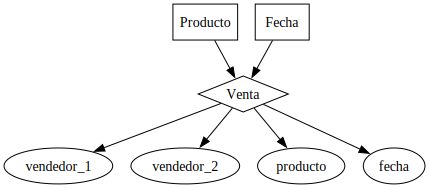

In [2]:
# Se crea el diagrama de relaciones

dot = Digraph(comment='Diagrama ER - Ventas')

# Entidades
dot.node('P', 'Producto', shape='box')
dot.node('V', 'Venta', shape='diamond')
dot.node('F', 'Fecha', shape='box')

# Atributos
dot.node('v1', 'vendedor_1', shape='ellipse')
dot.node('v2', 'vendedor_2', shape='ellipse')
dot.node('prod_id', 'producto', shape='ellipse')
dot.node('f', 'fecha', shape='ellipse')

# Relaciones
dot.edges([('P', 'V'), ('F', 'V')])
dot.edge('V', 'v1')
dot.edge('V', 'v2')
dot.edge('V', 'prod_id')
dot.edge('V', 'f')

# Mostrar 
display(dot)

In [3]:
# Aqui se presentan las estadisticas descriptivas.

# Convertir a numpy arrays
vendedor_1 = df['vendedor_1'].to_numpy()
vendedor_2 = df['vendedor_2'].to_numpy()
producto = df['producto'].to_numpy()
fechas = pd.to_datetime(df['fecha'], dayfirst=True).to_numpy()

# valor_1
print("vendedor 1:")
print("  Media:", np.mean(vendedor_1))
print("  Desviación estándar:", np.std(vendedor_1))
print("  Mínimo:", np.min(vendedor_1))
print("  Máximo:", np.max(vendedor_1))

# valor_2
print("\nvendedor 2:")
print("  Media:", np.mean(vendedor_2))
print("  Desviación estándar:", np.std(vendedor_2))
print("  Mínimo:", np.min(vendedor_2))
print("  Máximo:", np.max(vendedor_2))

vendedor 1:
  Media: 5.0132
  Desviación estándar: 2.2256292952780794
  Mínimo: 0
  Máximo: 15

vendedor 2:
  Media: 6.9998
  Desviación estándar: 2.6773494280724734
  Mínimo: 0
  Máximo: 21


In [4]:
# Aqui se agrupa los valores de los vendedores 1 y 2 por el codigo de producto que tienen donde mean es la media y count es la cantidad.
grouped = df.groupby('producto').agg({
    'vendedor_1': ['sum', 'mean', 'max', 'min', 'count'],
    'vendedor_2': ['sum', 'mean', 'max', 'min', 'count']
})
# Se imprimen los datos agrupados.
print(grouped)

          vendedor_1                         vendedor_2                    \
                 sum      mean max min count        sum      mean max min   
producto                                                                    
AIRE2200        2451  5.116910  11   0   479       3234  6.751566  16   1   
CAMARAHD        2483  5.077710  13   0   489       3538  7.235174  17   1   
CELULAA01       2443  4.945344  14   0   494       3522  7.129555  17   1   
CONSOLA9        2465  4.989879  14   0   494       3529  7.143725  17   0   
DRONE99         2449  4.927565  13   0   497       3402  6.845070  15   1   
IMPRES33        2617  5.023033  13   0   521       3564  6.840691  17   0   
LAPTOP15        2419  5.060669  15   0   478       3311  6.926778  16   1   
SMARTWAT        2671  5.116858  12   0   522       3643  6.978927  17   1   
TABLET10        2349  4.987261  14   0   471       3269  6.940552  16   1   
TV42            2719  4.899099  12   0   555       3987  7.183784  21   1   